LEVEL 22.0 — WHY DATABASE BECOMES SLOW

Imagine this situation:
- orders table has 10 million rows
- User opens app → “Show my orders”

Query:
- SELECT * FROM orders WHERE user_id = 42;

Without optimization:
- DB scans all 10M rows
- Very slow
- App lags

This is called FULL TABLE SCAN.

LEVEL 22.1 — WHAT IS AN INDEX? (ABSOLUTE ZERO)

Think of a book 📘
- Without index → read every page
- With index → jump directly to page

### Database index = shortcut to data

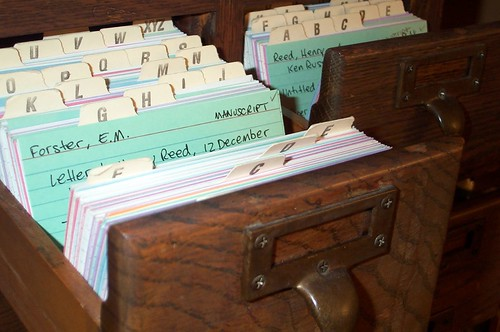
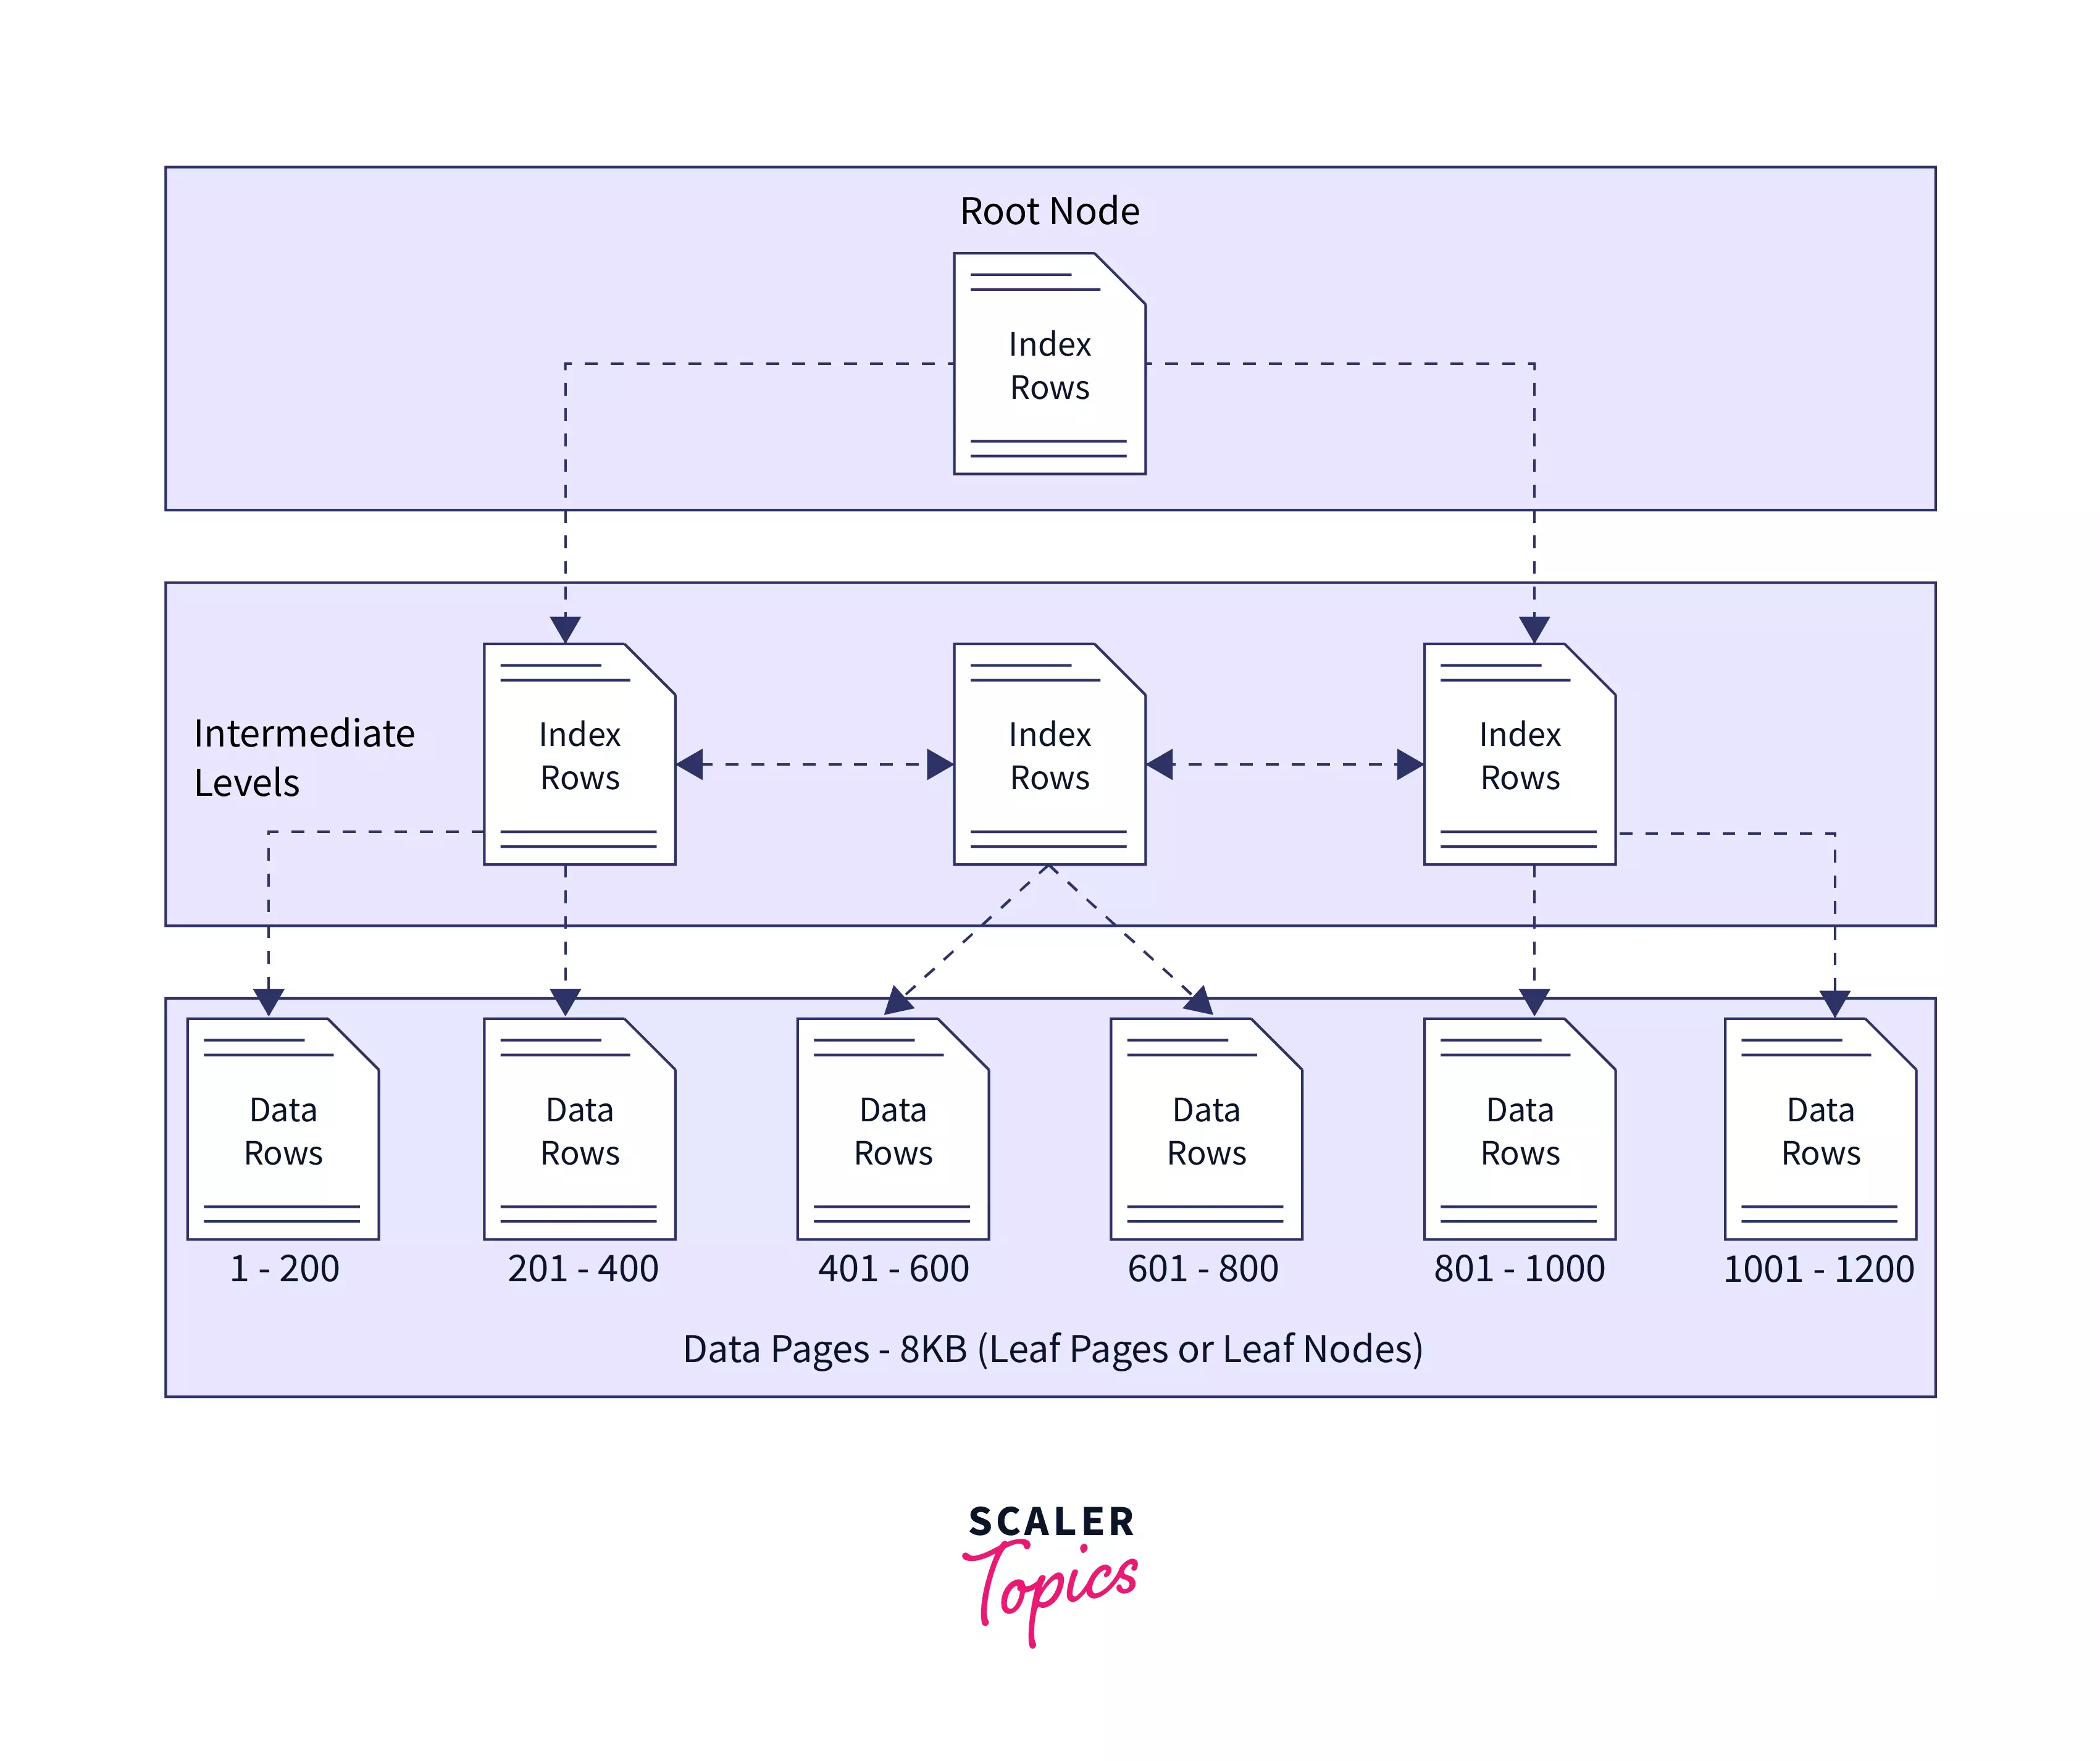
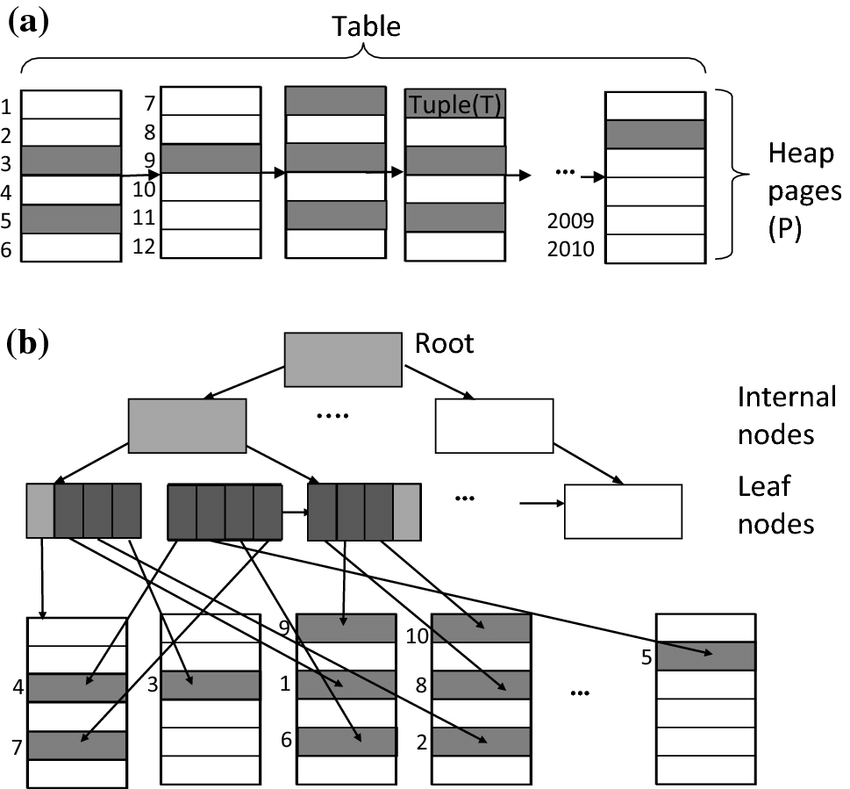

LEVEL 22.2 — SIMPLE INDEX 

Problem:
- Search orders by user_id

Solution:
- Create index on user_id

CREATE INDEX idx_orders_user
ON orders(user_id);

What happens internally:
- DB builds a sorted structure
- Search becomes O(log n) instead of O(n)

LEVEL 22.3 — WHEN SHOULD YOU ADD INDEX?

Good columns to index:
- user_id
- order_id
- restaurant_id
- created_at
- status

Bad columns to index:
- Very small tables
- Columns with only 2–3 values

LEVEL 22.4 — REAL SWIGGY-LIKE QUERIES

In [ ]:
# User order history
SELECT * FROM orders
WHERE user_id = 42
ORDER BY created_at DESC;

In [ ]:
# Best index:
CREATE INDEX idx_orders_user_time
ON orders(user_id, created_at);
# This is a COMPOSITE INDEX.

LEVEL 22.5 — COMPOSITE INDEX (IMPORTANT)

In [ ]:
# Composite index = index on multiple columns.
(user_id, created_at)

# Fast for:
WHERE user_id = ?
ORDER BY created_at

# Not useful for:
WHERE created_at = ?
# Index order matters

LEVEL 22.6 — INDEX FOR ORDER STATUS

In [ ]:
Example:

SELECT * FROM orders
WHERE status = 'DELIVERED';

Index:

CREATE INDEX idx_orders_status
ON orders(status);

Used by:
Analytics
Reports
Dashboards

LEVEL 22.7 — TOO MANY INDEXES = BAD ❌

Indexes are not free.

Each index:
- Uses memory
- Slows down INSERT / UPDATE

In [ ]:
Bad:
Index everything blindly

Good:
Index only what you query often

Interview phrase:

“Indexes improve read performance but slow down writes.”

LEVEL 22.8 — PRIMARY KEY = INDEX

In [ ]:
This:
PRIMARY KEY(order_id)

Already creates:
Index on order_id

No need to add extra index on primary key.

LEVEL 22.9 — EXPLAIN QUERY (ADVANCED BUT EASY)

How do you check if index is used?
- EXPLAIN SELECT * FROM orders WHERE user_id = 42;

Look for:
- Index Scan ✅
- Seq Scan ❌

Interviewers LOVE this.

LEVEL 22.10 — PAGINATION (PERFORMANCE BOOST)

In [ ]:
# ❌ Bad (loads everything):
SELECT * FROM orders WHERE user_id = 42;

# ✅ Good:
SELECT * FROM orders
WHERE user_id = 42
ORDER BY created_at DESC
LIMIT 10 OFFSET 0;

Used in:
- Order history screen
- Infinite scroll

LEVEL 22.11 — HOT TABLES IN SWIGGY

Tables that get huge traffic:
- orders
- order_items
- delivery_partners

Optimization used:
- Indexes
- Partitioning
- Archiving old data

LEVEL 22.12 — PARTITIONING (NEXT LEVEL)

When table is too big:

Example:
- orders_2024
- orders_2025

Or by user range:
- orders_1 → user_id 1–1M
- orders_2 → user_id 1M–2M

Keyword:
- Partition pruning

now i understand:
- What indexes are
- Why DB gets slow
- How to fix performance
- Real production patterns
- Interview-level answers

#### ONE-PAGE INTERVIEW SUMMARY 

### ❓ If the interviewer asks:
**“How do you optimize database performance?”**

### ✅ Answer:
> **“I use proper indexing on frequently queried columns, composite indexes for common access patterns, pagination to limit data, EXPLAIN to verify query plans, and partitioning for very large tables. I also balance indexes to avoid write overhead.”**

🔥 *That answer = strong candidate.*